In [2]:
from qiskit import QuantumCircuit, assemble, Aer, execute, QuantumRegister
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import plot_state_qsphere, plot_state_city
from math import sqrt, pi

In [4]:
### =-=-=-=-=-= 2.2 Multiple Qubits and Entangled States =-=-=-=-=-= ###

In [ ]:
# 1.
'''
Create a quantum circuit that produces the Bell state: 1/sqrt(2)(|01⟩ + |10⟩).
Use the statevector simulator to verify your result.
'''

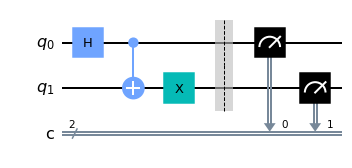

In [5]:
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.cx(0, 1)
qc1.x(1)

qc2 = QuantumCircuit(2, 2)
qc2.barrier()
qc2.measure(range(2), range(2))

qc = qc1 + qc2
qc.draw('mpl')

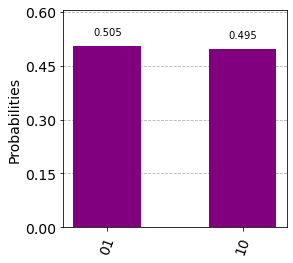

In [6]:
sim = Aer.get_backend('qasm_simulator')
counts = execute(qc, sim, shots = 5000).result().get_counts()
plot_histogram(counts, color = ['purple'], figsize = (4, 4))

In [7]:
sim = Aer.get_backend('statevector_simulator')
statevector = execute(qc1, sim).result().get_statevector()
print(statevector)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


In [ ]:
# 2.
'''
The circuit you created in question 1 transforms the state |00⟩ to 1/sqrt(2)(|01⟩ + |10⟩),
calculate the unitary of this circuit using Qiskit's simulator.
Verify this unitary does in fact perform the correct transformation.
'''

In [8]:
sim = Aer.get_backend('unitary_simulator')
result = execute(qc1, sim).result().get_unitary()

# A more "clear" matrix print
for i in range(0, len(result)):
    for j in range(0, len(result[i])):
        print(f'{result[i][j]:.3f}', end='   ')
    print('')

0.000+0.000j   0.000+0.000j   0.707+0.000j   0.707-0.000j   
0.707+0.000j   -0.707+0.000j   0.000+0.000j   0.000+0.000j   
0.707+0.000j   0.707-0.000j   0.000+0.000j   0.000+0.000j   
0.000+0.000j   0.000+0.000j   0.707+0.000j   -0.707+0.000j   


In [ ]:
# 3.
'''
Think about other ways you could represent a statevector visually.
Can you design an interesting visualization from which you can read the magnitude and
phase of each amplitude?
'''

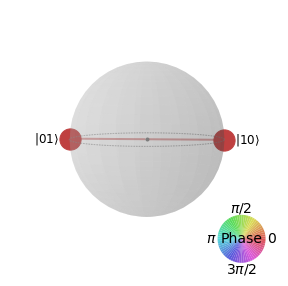

In [11]:
plot_state_qsphere(statevector, figsize = (5, 5))

In [ ]:
### =-=-=-=-=-= 2.3 Phase Kickback =-=-=-=-=-= ###

In [ ]:
# 1.
'''
What would be the resulting state of the control qubit (q0) if the target qubit (q1) was
in the state |0⟩? (as shown in the circuit below)
Use Qiskit to check your answer.
'''

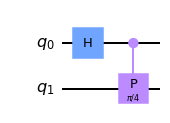

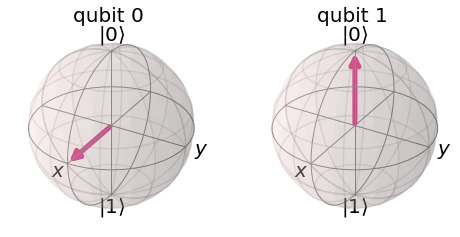

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))

sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result().get_statevector()
plot_bloch_multivector(result)

In [ ]:
# 2.
'''
What would happen to the control qubit (q0) if the if the target qubit (q1) was in
the state |1⟩, and the circuit used a controlled-Sdg gate instead of the controlled-T
(as shown in the circuit below)?
'''

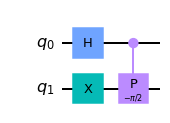

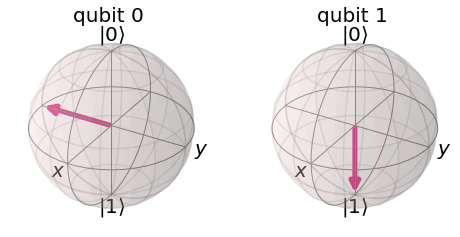

In [18]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cp(-pi/2, 0, 1)
display(qc.draw('mpl'))

sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result().get_statevector()
plot_bloch_multivector(result)

In [ ]:
# 3.
'''
What would happen to the control qubit (q0) if it was in the state |1⟩ instead of the
state |+⟩ before application of the controlled-T (as shown in the circuit below)?
'''

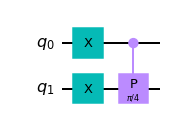

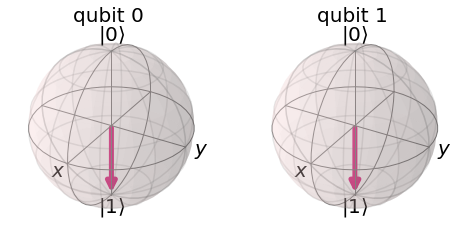

In [25]:
qc = QuantumCircuit(2)
qc.x([0, 1])
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))

sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim).result().get_statevector()
plot_bloch_multivector(result)

In [ ]:
### =-=-=-=-=-= 2.4 More Circuit Identities =-=-=-=-=-= ###

In [ ]:
'''
Find different circuit that swaps qubits in the states |+⟩ and |−⟩,
and show this is equivalent to the circuit shown below.
'''

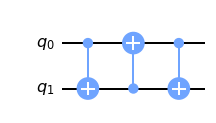

1.000+0.000j   0.000+0.000j   0.000+0.000j   0.000+0.000j   
0.000+0.000j   0.000+0.000j   1.000+0.000j   0.000+0.000j   
0.000+0.000j   1.000+0.000j   0.000+0.000j   0.000+0.000j   
0.000+0.000j   0.000+0.000j   0.000+0.000j   1.000+0.000j   


In [62]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
display(qc.draw('mpl'))

sim = Aer.get_backend('unitary_simulator')
result = execute(qc, sim).result().get_unitary()
# A more "clear" matrix print
for i in range(0, len(result)):
    for j in range(0, len(result[i])):
        print(f'{result[i][j]:.3f}', end='   ')
    print('')

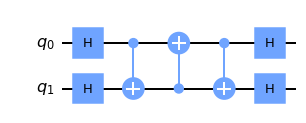

1.000-0.000j   -0.000+0.000j   -0.000+0.000j   -0.000-0.000j   
-0.000+0.000j   -0.000-0.000j   1.000-0.000j   -0.000+0.000j   
-0.000+0.000j   1.000-0.000j   -0.000-0.000j   -0.000+0.000j   
-0.000-0.000j   -0.000+0.000j   -0.000+0.000j   1.000-0.000j   


In [63]:
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
qc.h([0, 1])
display(qc.draw('mpl'))

sim = Aer.get_backend('unitary_simulator')
result = execute(qc, sim).result().get_unitary()
# A more "clear" matrix print
for i in range(0, len(result)):
    for j in range(0, len(result[i])):
        print(f'{result[i][j]:.3f}', end='   ')
    print('') 


In [ ]:
### =-=-=-=-=-= 2.6 Classical Computation on a Quantum Computer =-=-=-=-=-= ###

In [ ]:
# 1.
'''
Show that the output is correctly written to the 'final output' register
(and only to this register) when the 'output' register is initialized as |0⟩.
'''

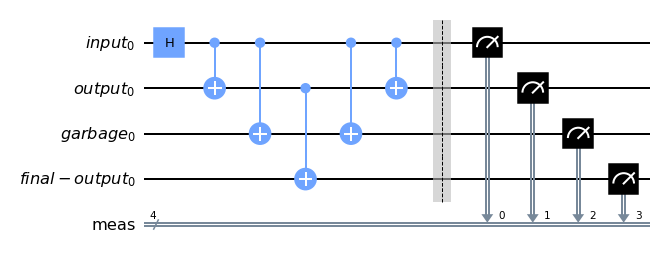

In [3]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])

final_output_bit = QuantumRegister(1, 'final-output')
copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)
copy.draw('mpl')

meas = QuantumCircuit(input_bit, output_bit, garbage_bit, final_output_bit)
meas.measure_all()

qc1 = QuantumCircuit(input_bit)
qc1.h(input_bit)

qc = qc1 + Vf.inverse() + copy + Vf + meas
qc.draw('mpl')

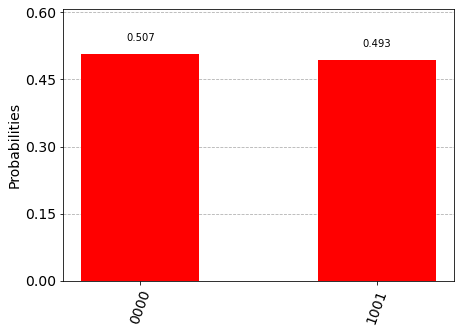

In [83]:
sim = Aer.get_backend('qasm_simulator')
counts = execute(qc, sim, shots = 5000).result().get_counts()
plot_histogram(counts, color = 'red')

In [ ]:
# 2.
'''
Determine what happens when the 'output' register is initialized as |1⟩.
'''

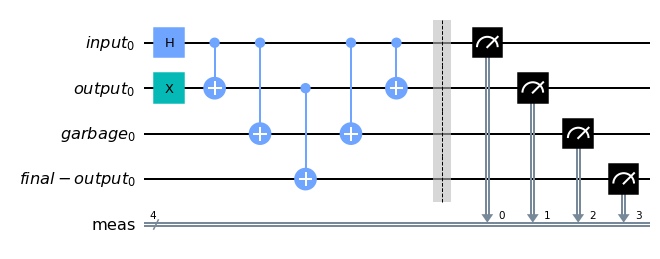

In [85]:
qc_output = QuantumCircuit(output_bit)
qc_output.x(output_bit)

qc = qc1 + qc_output + Vf.inverse() + copy + Vf + meas
display(qc.draw('mpl'))

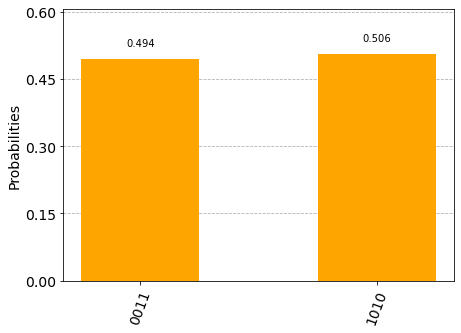

In [88]:
counts = execute(qc, sim, shots = 5000).result().get_counts()
plot_histogram(counts, color = 'orange')

In [64]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.5',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.6'}